<a href="https://colab.research.google.com/github/Patrick-Setubal/data_science_analytics/blob/main/alura_curso/formacao_data_science/gorjetas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objetivo

O objetivo dessa analise é aprender a utilizar as diferentes ferramentas de data science

O Dataset Utilizado possui 5 colunas sobre o consumo dos clientes em um restaurante, contendo valores da conta, da gorjeta, dia da semana, se teve ou não sobremesa e a quantidade de pessoas.

# Importação e Limpeza dos dados


In [ ]:
# Importação das bibliotecas e da Base de dados
import pandas as pd
import seaborn as sns

adress_data = r'https://raw.githubusercontent.com/Patrick-Setubal/data_science_analytics/main/alura_curso/formacao_data_science/tips.csv'
df = pd.read_csv(adress_data)

In [ ]:
df.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [ ]:
# Renomear Colunar Para facilitar entendimento
renomear = {
    'total_bill': 'valor_da_conta',
    'tip': 'gorjeta',
    'dessert': 'sobremesa',
    'day': 'dia_da_semana',  
    'time': 'hora_do_dia', 
    'size': 'total_de_pessoas'}

df_gorjetas = df.rename(columns= renomear)
df_gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [ ]:
# Verificando Missings e tratar se precisar 
print(f'A base de dados tem {df_gorjetas.shape[0]} linhas')
print(df_gorjetas.isnull().sum())

A base de dados tem 244 linhas
valor_da_conta      0
gorjeta             0
sobremesa           0
dia_da_semana       0
hora_do_dia         0
total_de_pessoas    0
dtype: int64


# Analisando Gorjeta VS Valor da Compra

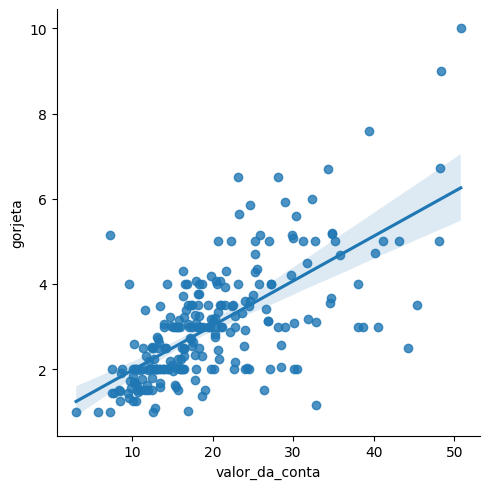

In [ ]:
# Analisar grafico de gorjeta por valor da compra 
valor_gorjeta = sns.lmplot(x='valor_da_conta', y='gorjeta', data=df_gorjetas)

**Visualmente, o valor da gorjeta aumenta junto com o valor da compra**

In [ ]:
# Vamos ver se este aumento é proporcional
df_gorjetas['porcentagem'] = (df_gorjetas['gorjeta'] / df_gorjetas['valor_da_conta']).round(2)
df_gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,No,Sun,Dinner,2,0.06
1,10.34,1.66,No,Sun,Dinner,3,0.16
2,21.01,3.50,No,Sun,Dinner,3,0.17
3,23.68,3.31,No,Sun,Dinner,2,0.14
4,24.59,3.61,No,Sun,Dinner,4,0.15


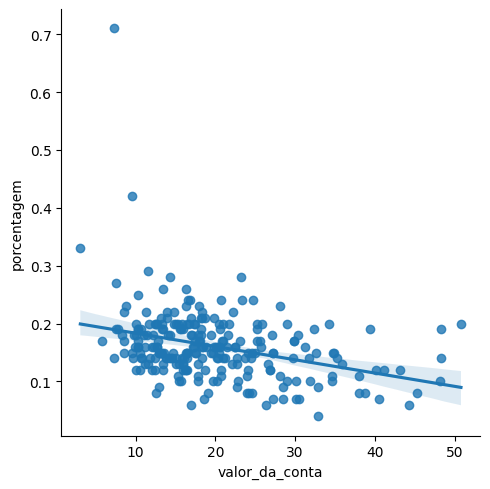

In [ ]:
porcetagem_conta = sns.lmplot(x='valor_da_conta',y='porcentagem',data=df_gorjetas)


**Porem proporcionalmente falando quanto maior o valor da compra menor a gorjeta**

# Analisando Gorjeta VS Sobremesa

In [ ]:
df_gorjetas[df_gorjetas['sobremesa']!="No"].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [ ]:
df_gorjetas[df_gorjetas['sobremesa']=="No"].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


<ipython-input-10-5b4c9e083a85>:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x=df_gorjetas['sobremesa'], y=df_gorjetas['gorjeta'], palette=["red", "green"])


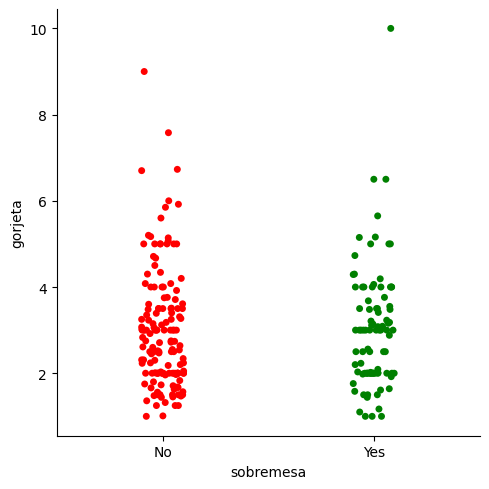

In [ ]:
sns.catplot(x=df_gorjetas['sobremesa'], y=df_gorjetas['gorjeta'], palette=["red", "green"])

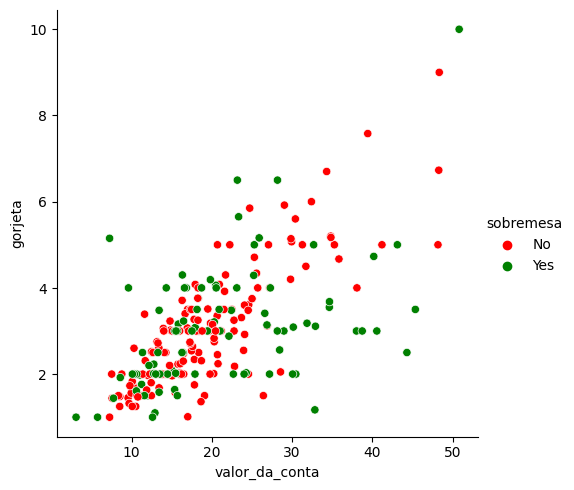

In [ ]:
sns.relplot(x='valor_da_conta', y='gorjeta', data=df_gorjetas, hue='sobremesa', palette=["red", "green"])

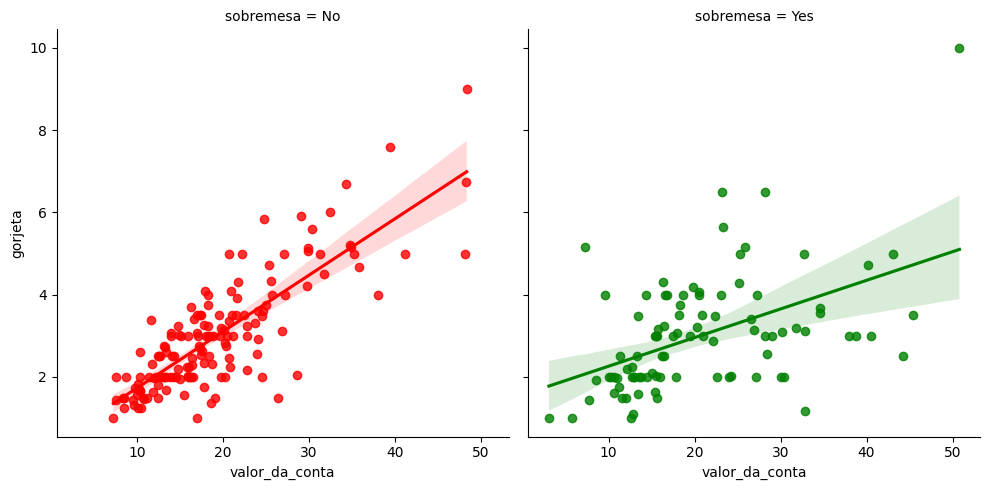

In [ ]:
sns.lmplot(x='valor_da_conta', y='gorjeta', data=df_gorjetas, col='sobremesa', hue='sobremesa', palette=["red", "green"])

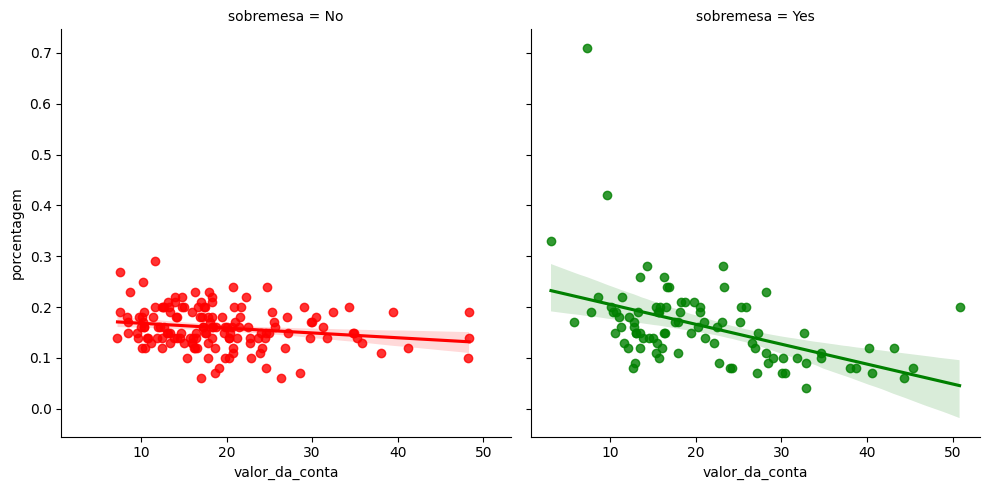

In [ ]:
sns.lmplot(x='valor_da_conta', y='porcentagem', data=df_gorjetas, col='sobremesa', hue='sobremesa', palette=["red", "green"])

**Existe uma diferença na gorjeta dos clientes que pedirão gorjeta**

## Teste de Hipotese
 - H<sup>Null</sup> =  A distribuição da Taxa de gorjeta é igual nos grupos
 - H<sup>Alt</sup> =   A distribuição da Taxa de gorjeta Não igual nos grupos

In [ ]:
from scipy.stats import ranksums

In [ ]:
com_sobremesa = df_gorjetas.query("sobremesa == 'Yes'").porcentagem
sem_sobremesa = df_gorjetas.query("sobremesa == 'No'").porcentagem
ranksums(com_sobremesa, sem_sobremesa).pvalue

0.5266635660124415

**Resultado:** H<sup>Null</sup> Ja que o valor do pvalue é maior que 0,05 a distribuição da taxa de gorjeta nos dois grupos sao iguais 

# Analisando Gorjeta VS Dia da semana

In [ ]:
df_gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

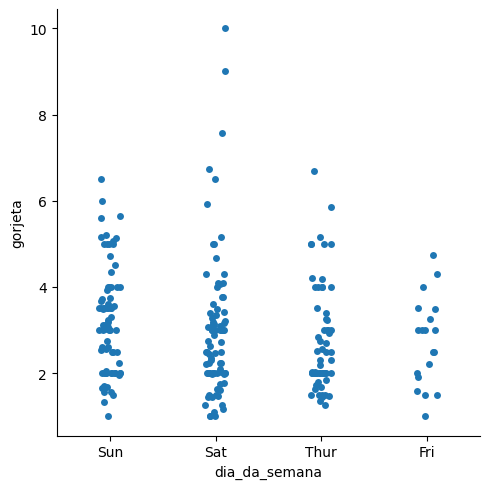

In [ ]:
sns.catplot(x='dia_da_semana', y='gorjeta' ,data=df_gorjetas)

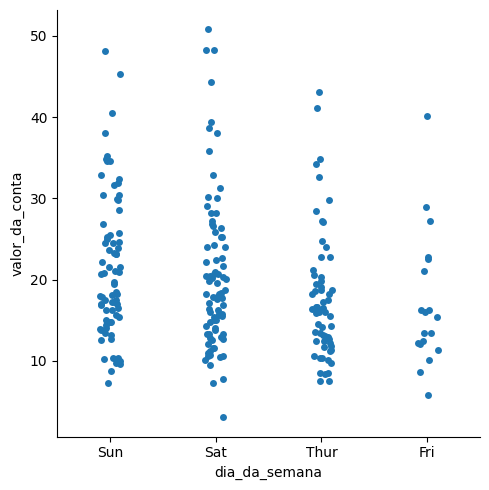

In [ ]:
sns.catplot(x='dia_da_semana', y='valor_da_conta' ,data=df_gorjetas)

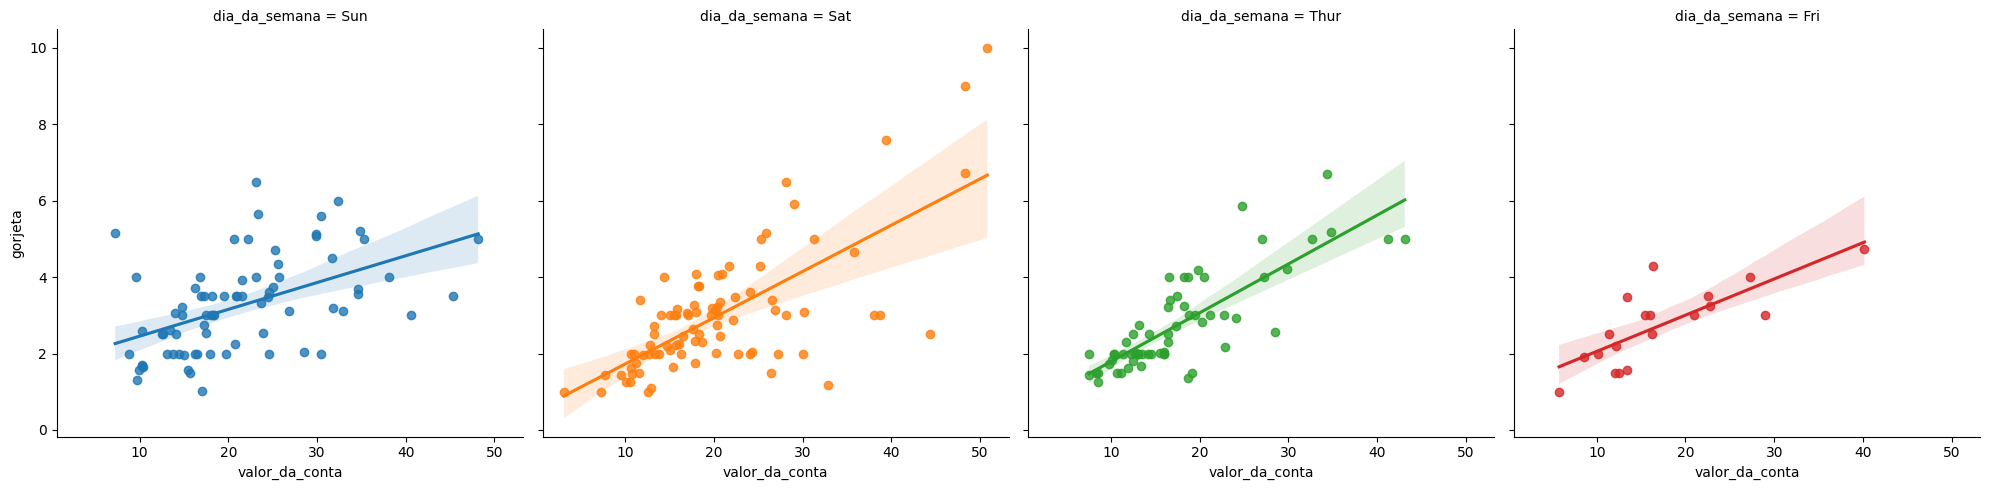

In [ ]:
sns.lmplot(x='valor_da_conta', y='gorjeta' ,data=df_gorjetas, col='dia_da_semana', hue='dia_da_semana')

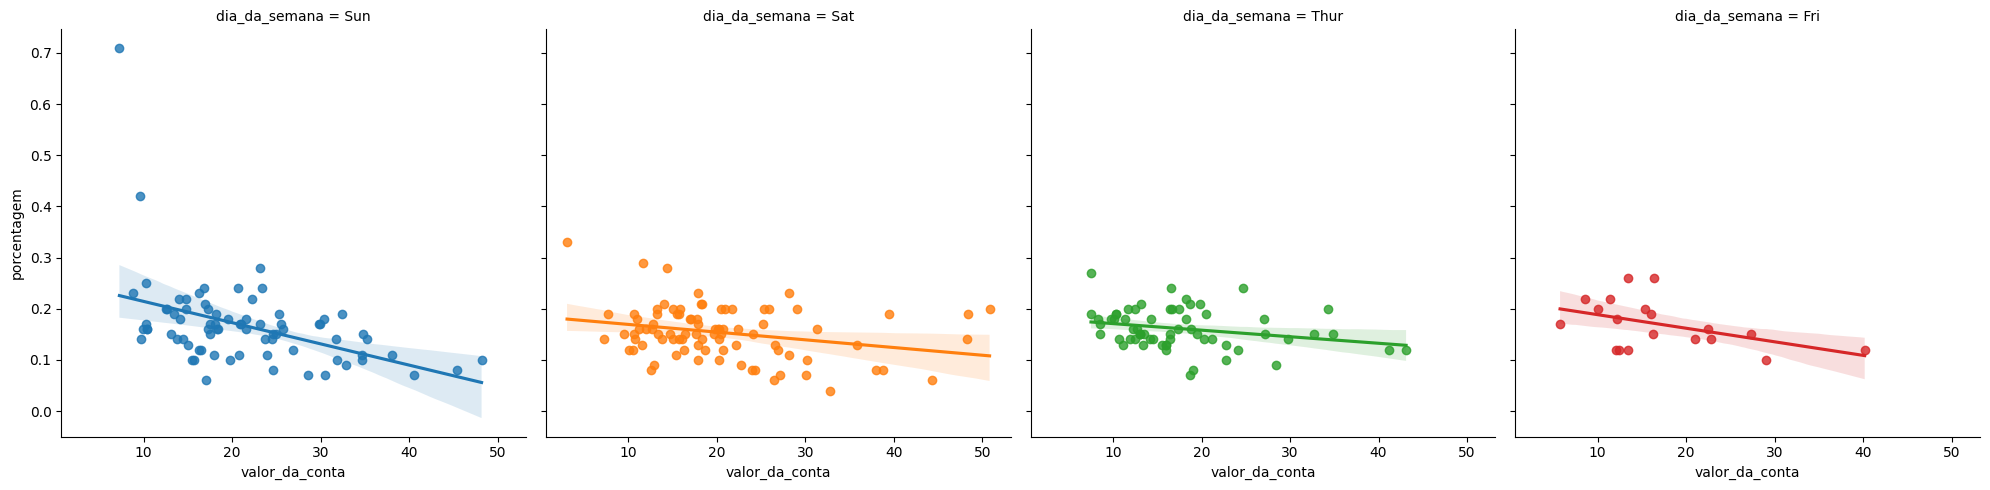

In [ ]:
sns.lmplot(x='valor_da_conta', y='porcentagem' ,data=df_gorjetas, col='dia_da_semana', hue='dia_da_semana')

In [ ]:
print(f"A media geral das gorjetas é de {df_gorjetas.gorjeta.mean()}")

A media geral das gorjetas é de 2.99827868852459


In [ ]:
df_gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta',	'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Fri,17.151579,2.734737,0.169474
Sat,20.441379,2.993103,0.153678
Sun,21.410000,3.255132,0.166974
Thur,17.682742,2.771452,0.161129


In [ ]:
print("Frequencia dos Dias")
df_gorjetas.dia_da_semana.value_counts()

Frequencia dos Dias


Sat     87
Sun     76
Thur    62
Fri     19
Name: dia_da_semana, dtype: int64

**A frequencia do sabado é maior porem no domingo a media da gojeta é maior**

## Teste de Hipotese
 - H<sup>Null</sup> =  A distribuição da conta é igual no sabado e no domingo 
 - H<sup>Alt</sup> =   A distribuição da conta não é igual no sabado e no domingo 

In [ ]:
sabado = df_gorjetas.query("dia_da_semana =='Sat'").valor_da_conta
domingo = df_gorjetas.query("dia_da_semana =='Sun'").valor_da_conta
ranksums(sabado,domingo).pvalue

0.3576728477868443

**Resultado:** H<sup>Null</sup> Ja que o valor do pvalue é maior que 0,05

# Analisando Gorjeta Vs hora do dia

In [ ]:
df_gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [ ]:
df_gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,No,Sun,Dinner,2,0.06
1,10.34,1.66,No,Sun,Dinner,3,0.16
2,21.01,3.50,No,Sun,Dinner,3,0.17
3,23.68,3.31,No,Sun,Dinner,2,0.14
4,24.59,3.61,No,Sun,Dinner,4,0.15


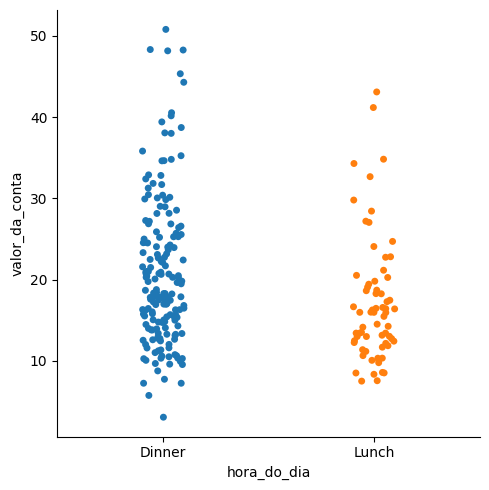

In [ ]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', data=df_gorjetas, hue='hora_do_dia')

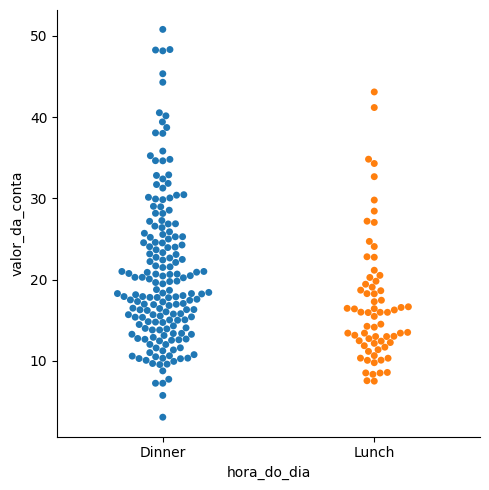

In [ ]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', kind='swarm',data=df_gorjetas, hue='hora_do_dia')

<Axes: xlabel='hora_do_dia', ylabel='valor_da_conta'>

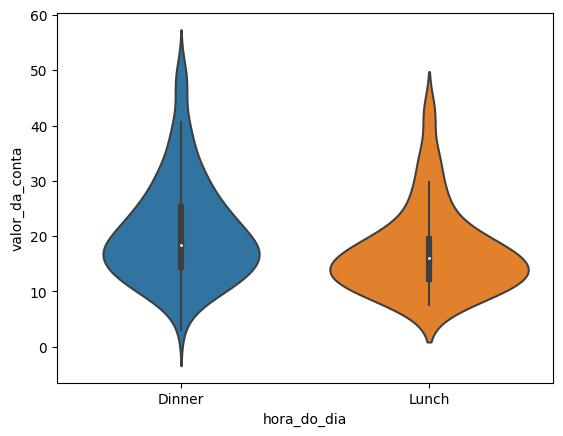

In [ ]:
sns.violinplot(x='hora_do_dia', y='valor_da_conta', data=df_gorjetas)

<Axes: xlabel='hora_do_dia', ylabel='valor_da_conta'>

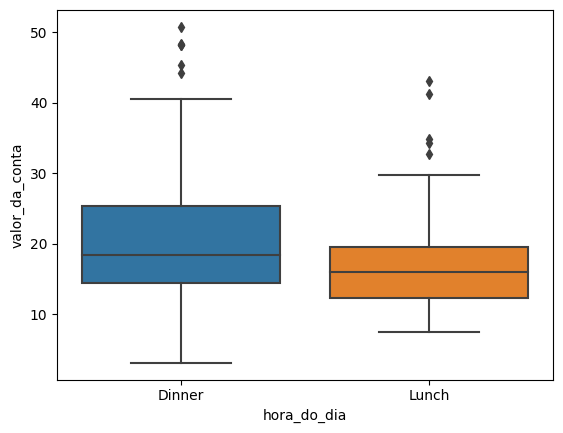

In [ ]:
sns.boxplot(x='hora_do_dia', y='valor_da_conta', data=df_gorjetas)

<ipython-input-31-482170c0aa4d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lunch)


<Axes: xlabel='valor_da_conta', ylabel='Density'>

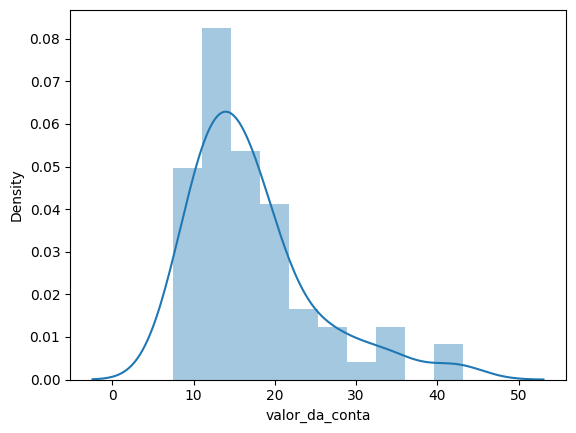

In [ ]:
lunch = df_gorjetas.query("hora_do_dia == 'Lunch'").valor_da_conta
sns.distplot(lunch)

<ipython-input-32-e027b9f06afa>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dinner)


<Axes: xlabel='valor_da_conta', ylabel='Density'>

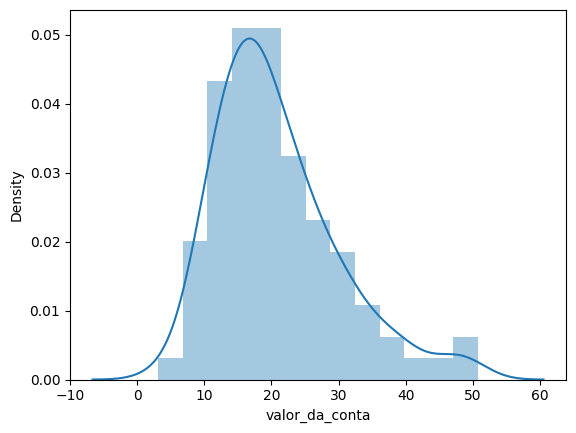

In [ ]:
dinner = df_gorjetas.query("hora_do_dia == 'Dinner'").valor_da_conta
sns.distplot(dinner)

In [ ]:
df_gorjetas.groupby(['hora_do_dia']).mean()[['valor_da_conta'	,'gorjeta',	'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Dinner,20.797159,3.102670,0.159773
Lunch,17.168676,2.728088,0.163971


## Teste de Hipotese
 - H<sup>Null</sup> =  A distribuição da conta é igual no almoço e no jantar 
 - H<sup>Alt</sup> =   A distribuição da conta não é igual no almoço e no jantar

In [ ]:
ranksums(dinner,lunch).pvalue

0.0011791039723641672

**Resultado** - H<sup>Alt</sup> =   A distribuição da conta não é igual no almoço e no jantar

## Teste de Hipotese
 - H<sup>Null</sup> =  A distribuição da taxa da gorjeta é igual no almoço e no jantar 
 - H<sup>Alt</sup> =   A distribuição da taxa da gorjeta não é igual no almoço e no jantar

In [ ]:
porcentagem_lunch = df_gorjetas.query("hora_do_dia == 'Lunch'").porcentagem
porcentagem_dinner = df_gorjetas.query("hora_do_dia == 'Dinner'").porcentagem
ranksums(porcentagem_lunch,porcentagem_dinner).pvalue

0.2602493995587126

**Resultado** - H<sup>Null</sup> =  A distribuição da taxa da gorjeta é igual no almoço e no jantar 